In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [35]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

initial parameters: w1=0.027, w2=0.247, b=0.977
initial cost = 70.007
final parameters: w1=1.256, w2=-88.859, b=87.795
final cost = 3.897


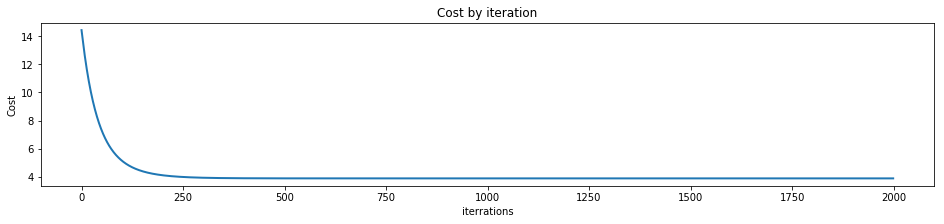

In [4]:
x1 = iris['data'][:,0]
x2 = iris['data'][:,1]
y = iris['data'][:,2]

# sum squared error
def cost(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

W1 = np.arange(-2, 4, 0.1)
W2 = np.arange(-2, 4, 0.1)
B  = np.arange(-6, 8, 0.1)

# normalize
x1 /= x1.max()
x2 /= x2.max()
y /= y.max()

# choose a random initial w1, w2, b
w1, w2, b = random.random(), random.random(), random.random()

def F(w1, x1, w2, x2, b):
    return w1*x1 + w2+x2 + b;

# what is our error?
y_pred = F(w1, x1, w2, x2, y)
init_cost = cost(y_pred, y)

print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w1, w2, b))
print("initial cost = %0.3f" % init_cost)

# implement partial derivatives of our parameters
def dJdw1(w1, x1, w2, x2, b, y):
    return - np.dot(x1, y - F(w1, x1, w2, x2, b))
def dJdw2(w1, x1, w2, x2, b, y):
    return - np.dot(x2, y - F(w1, x1, w2, x2, b))
def dJdb(w1, x1, w2, x2, b, y):
    return - np.sum(y - F(w1, x1, w2, x2, b))

# choose the alpha parameter and number of iterations
alpha = 0.01
n_iters = 2000

errors = []
for i in range(n_iters):
    w1 = w1 - alpha * dJdw1(w1, x1, w2, x2, b, y)
    w2 = w2 - alpha * dJdw2(w1, x1, w2, x2, b, y)
    b = b - alpha * dJdb(w1, x1, w2, x2, b, y)
    y_pred = F(w1, x1, w2, x2, b)
    j = cost(y_pred, y)
    errors.append(j)
    
# plot it 
plt.figure(figsize=(16,3))
plt.plot(range(n_iters),errors,linewidth=2)
plt.title('Cost by iteration')
plt.ylabel('Cost')
plt.xlabel('iterrations')

# what is our final error rate
y_pred = F(w1, x1, w2, x2, b)
final_cost = cost(y_pred, y)

print('final parameters: w1=%0.3f, w2=%0.3f, b=%0.3f' %(w1,w2,b))
print('final cost = %0.3f' % final_cost)

### Xin's Question
1. What kind of range should we give to W1, W2, B ? 
2. How to choose the alpha parameter and number of iterations ? 